EXAMPLE: Using aweSOM to segment 4-dimensional multiclass classification data from the iris dataset (https://archive.ics.uci.edu/dataset/53/iris)

Import aweSOM and iris dataset

In [1]:
from aweSOM import Lattice
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Basic information about the dataset

In [2]:
iris = load_iris()

print("Shape of the data :", iris.data.shape)
print("Labeled classes :", iris.target_names)
print("Features in the set :", iris.feature_names)

Shape of the data : (150, 4)
Labeled classes : ['setosa' 'versicolor' 'virginica']
Features in the set : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Visualize the dataset in a few different ways

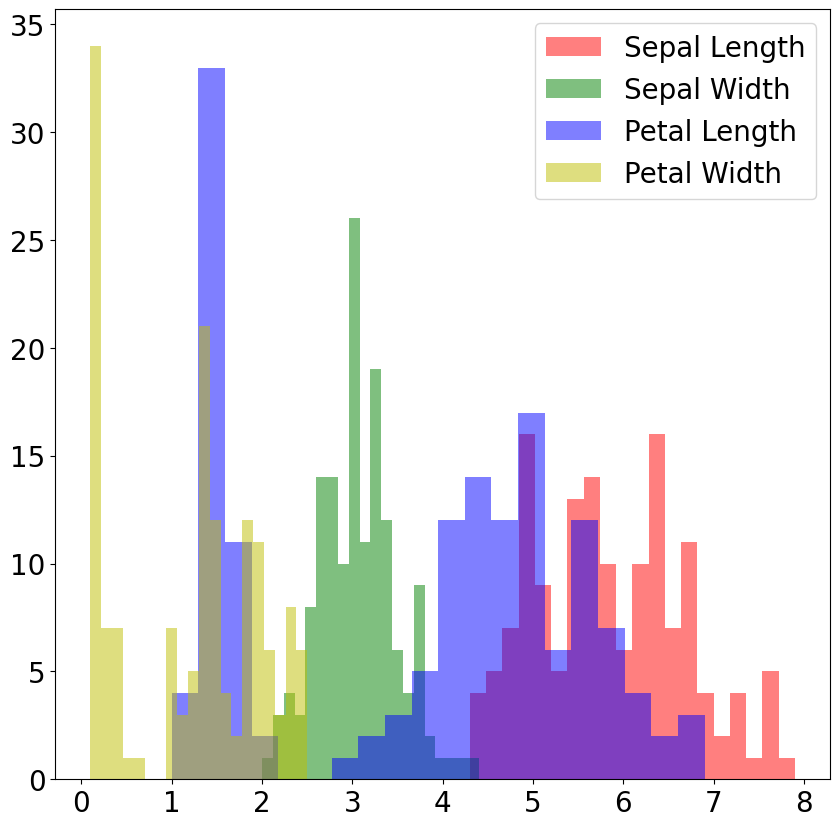

In [3]:
plt.rcParams.update({'font.size': 20})

# Histogram
plt.figure(figsize=(10, 10))
plt.hist(iris.data[:,0], bins=20, color='r', alpha=0.5, label='Sepal Length')
plt.hist(iris.data[:,1], bins=20, color='g', alpha=0.5, label='Sepal Width')
plt.hist(iris.data[:,2], bins=20, color='b', alpha=0.5, label='Petal Length')
plt.hist(iris.data[:,3], bins=20, color='y', alpha=0.5, label='Petal Width')
plt.legend()
plt.show()

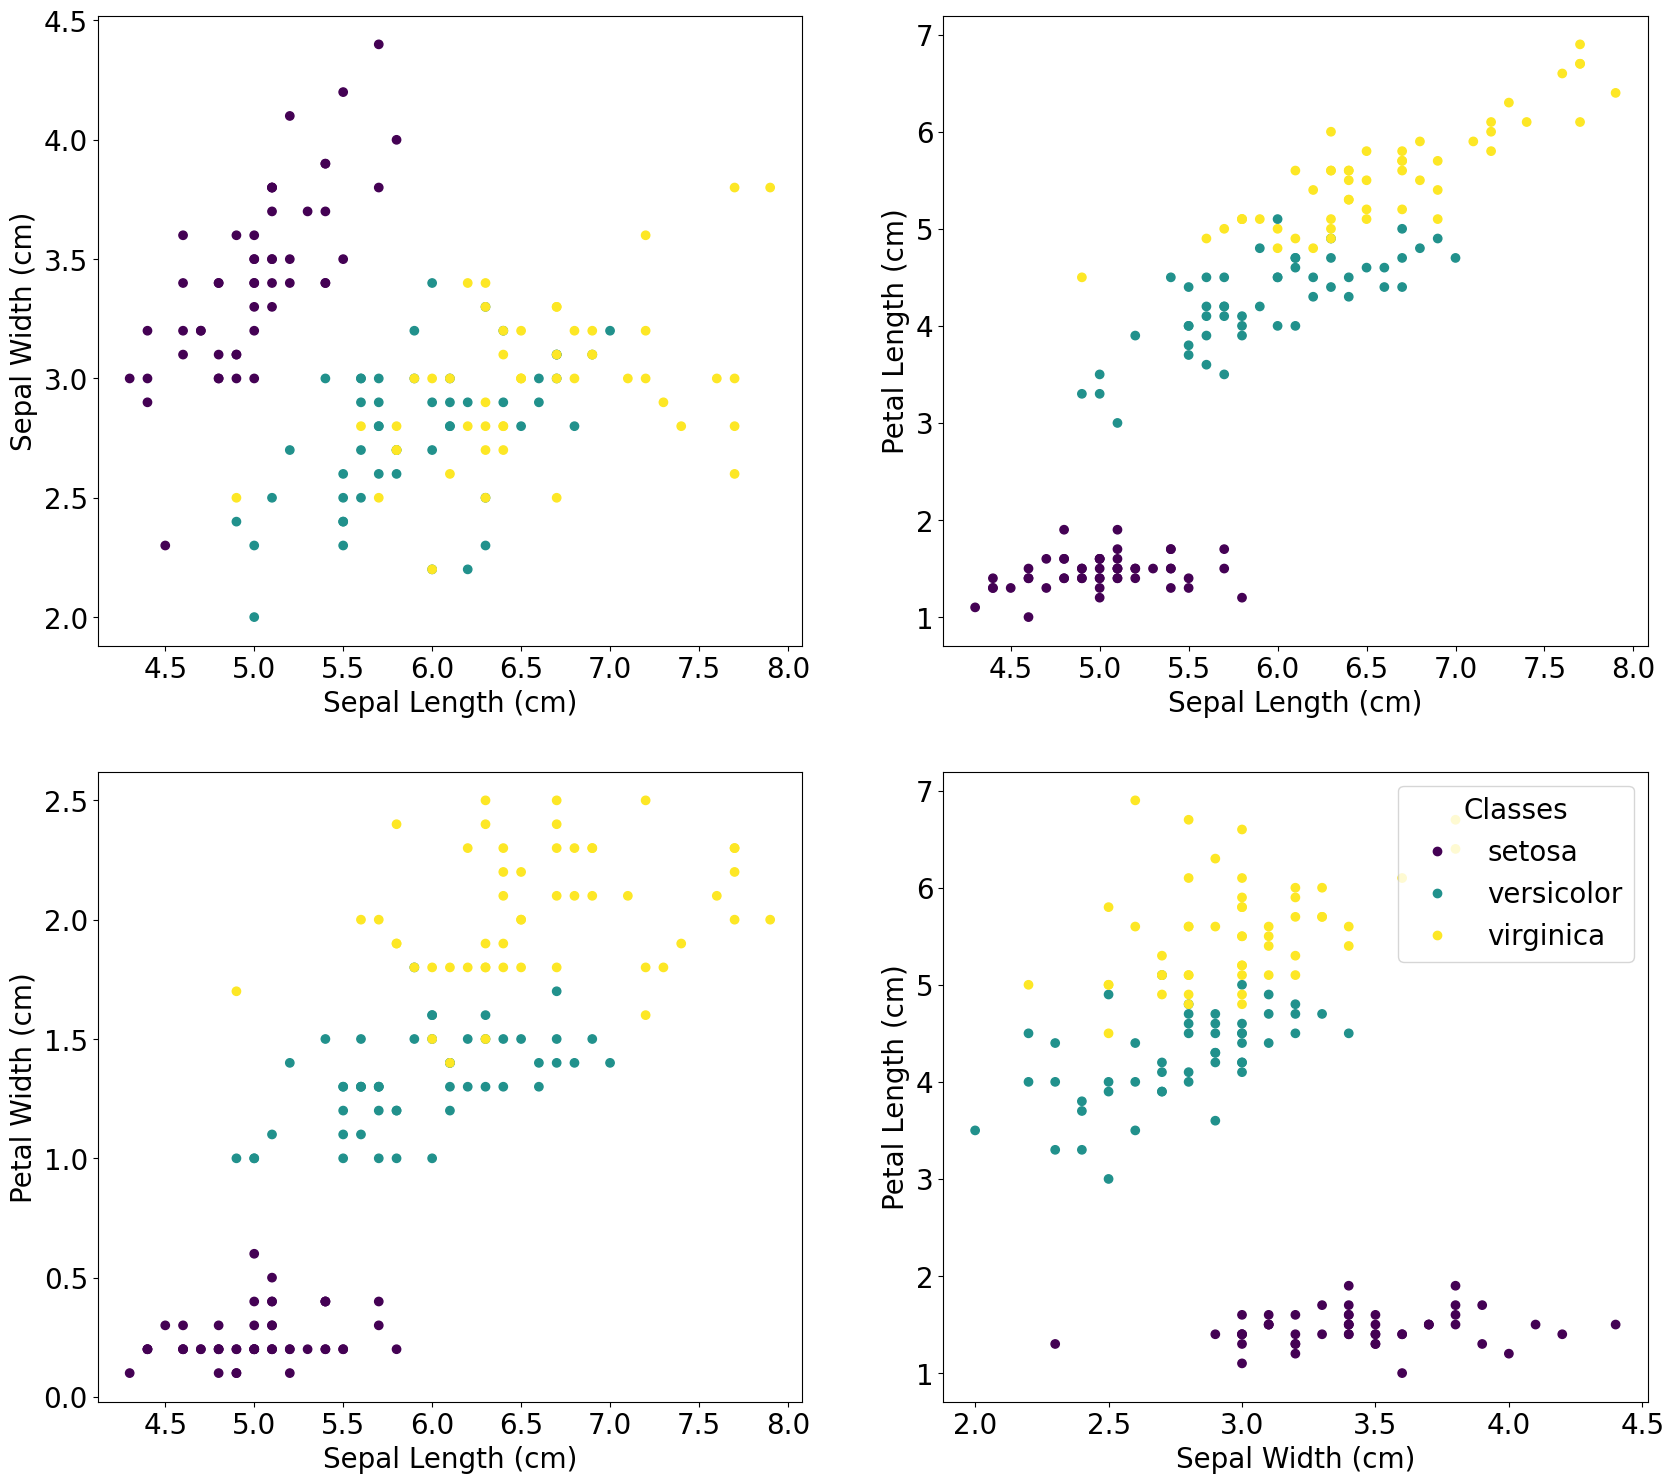

In [4]:
# Scatter plots
fig, axs = plt.subplots(2, 2, figsize=(20, 18))
scatter = axs[0,0].scatter(iris.data[:,0], iris.data[:,1], c=iris.target, cmap='viridis')
axs[0,0].set_xlabel('Sepal Length (cm)')
axs[0,0].set_ylabel('Sepal Width (cm)')
axs[0,1].scatter(iris.data[:,0], iris.data[:,2], c=iris.target, cmap='viridis')
axs[0,1].set_xlabel('Sepal Length (cm)')
axs[0,1].set_ylabel('Petal Length (cm)')
axs[1,0].scatter(iris.data[:,0], iris.data[:,3], c=iris.target, cmap='viridis')
axs[1,0].set_xlabel('Sepal Length (cm)')
axs[1,0].set_ylabel('Petal Width (cm)')
axs[1,1].scatter(iris.data[:,1], iris.data[:,2], c=iris.target, cmap='viridis')
axs[1,1].set_xlabel('Sepal Width (cm)')
axs[1,1].set_ylabel('Petal Length (cm)')
# axs[0,1].legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")
plt.legend(scatter.legend_elements()[0], iris.target_names, loc="upper right", title="Classes")

Pre-processing step : normalize data with either MinMaxScaler (shift the distribution to between 0 and 1) or StandardScaler (shift the mean to 0 and standard deviation of the sample to 1). Here we use the custom scaler described in Ha et al. 2024

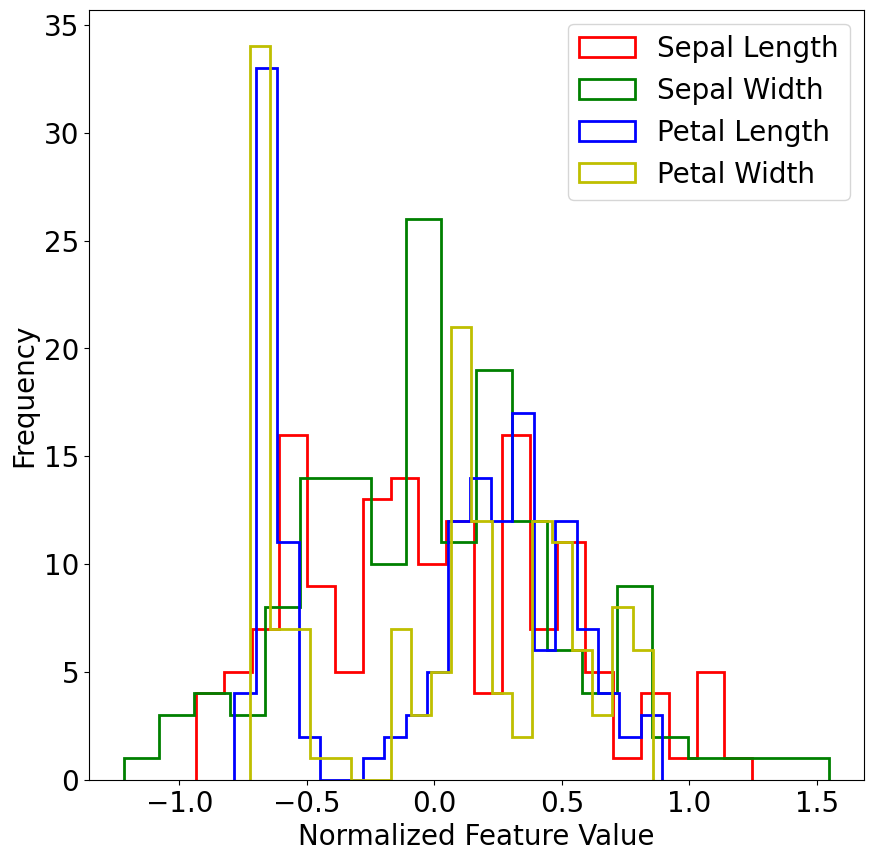

In [5]:
import aweSOM.run_som as rs
iris_data_transformed = rs.manual_scaling(iris.data)

plt.figure(figsize=(10, 10))
plt.hist(iris_data_transformed[:,0], bins=20, color='r', label='Sepal Length', histtype='step', linewidth=2)
plt.hist(iris_data_transformed[:,1], bins=20, color='g', label='Sepal Width', histtype='step', linewidth=2)
plt.hist(iris_data_transformed[:,2], bins=20, color='b', label='Petal Length', histtype='step', linewidth=2)
plt.hist(iris_data_transformed[:,3], bins=20, color='y', label='Petal Width', histtype='step', linewidth=2)
plt.xlabel('Normalized Feature Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Example lattice: SOM run with xdim = 20, ydim = 8, alpha_0 = 0.5, N = 10000, decaying alpha, sampling data points as initial weights

Initialize the SOM map

In [6]:
xdim, ydim = 40, 15 # small map since there are only 150 samples
alpha_0 = 0.5
train = 100000

print(f'constructing aweSOM lattice for xdim={xdim}, ydim={ydim}, alpha={alpha_0}, train={train}...', flush=True)
map=Lattice(xdim, ydim, alpha_0, train, )

constructing aweSOM lattice for xdim=40, ydim=15, alpha=0.5, train=100000...


Train the SOM with only one batch

In [7]:
labels = iris.target
feature_names = iris.feature_names

map.train_lattice(iris_data_transformed,feature_names,labels,)
lattice = map.lattice

starting epoch is:  0
stopping epoch is:  100000
Saving lattice every  500  epochs


Begin training
Evaluating epoch =  0
Decaying learning rate to 0.375 at epoch 4000
Decaying learning rate to 0.28125 at epoch 8000
Evaluating epoch =  10000
Decaying learning rate to 0.2109375 at epoch 12000
Decaying learning rate to 0.158203125 at epoch 16000
Evaluating epoch =  20000
Decaying learning rate to 0.11865234375 at epoch 20000
Decaying learning rate to 0.0889892578125 at epoch 24000
Decaying learning rate to 0.066741943359375 at epoch 28000
Evaluating epoch =  30000
Decaying learning rate to 0.05005645751953125 at epoch 32000
Decaying learning rate to 0.03754234313964844 at epoch 36000
Evaluating epoch =  40000
Decaying learning rate to 0.028156757354736328 at epoch 40000
Decaying learning rate to 0.021117568016052246 at epoch 44000
Decaying learning rate to 0.015838176012039185 at epoch 48000
Evaluating epoch =  50000
Shrinking neighborhood size to 41 at epoch 50719
Shrinking neighborhood size to 40 at epoch 51476
Decaying learning rate to 0.011878632009029388 at epoch 52

Visualize result with Umatrix

Text(0.5, 1.0, 'UMatrix for 40x15 SOM')

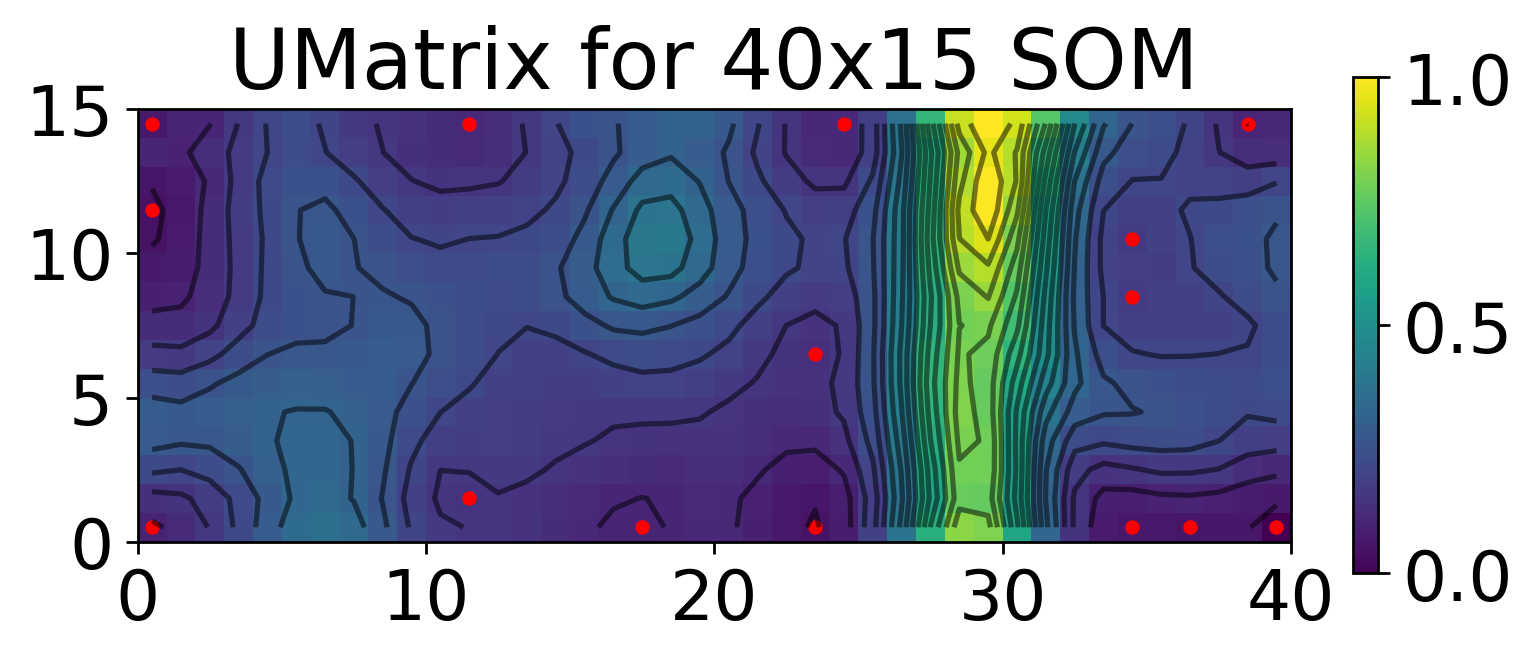

In [8]:
map.compute_umat()
unique_centroids = map.get_unique_centroids(map.compute_centroids())

unique_centroids['position_x'] = [x+0.5 for x in unique_centroids['position_x']]
unique_centroids['position_y'] = [y+0.5 for y in unique_centroids['position_y']]

X,Y = np.meshgrid(np.arange(xdim)+0.5, np.arange(ydim)+0.5)

plt.figure(dpi=250)
plt.pcolormesh(map.umat.T, cmap='viridis')
plt.scatter(unique_centroids['position_x'],unique_centroids['position_y'], color='red', s=10)
plt.colorbar(fraction=0.02)
plt.contour(X, Y, map.umat.T, levels=np.linspace(np.min(map.umat),np.max(map.umat), 20), colors='black', alpha=0.5)
plt.gca().set_aspect("equal")
plt.title(rf'UMatrix for {xdim}x{ydim} SOM')

In [9]:
umat_history = map.umat_history

You can also look at the history of the map with umat_history (and lattice_history)

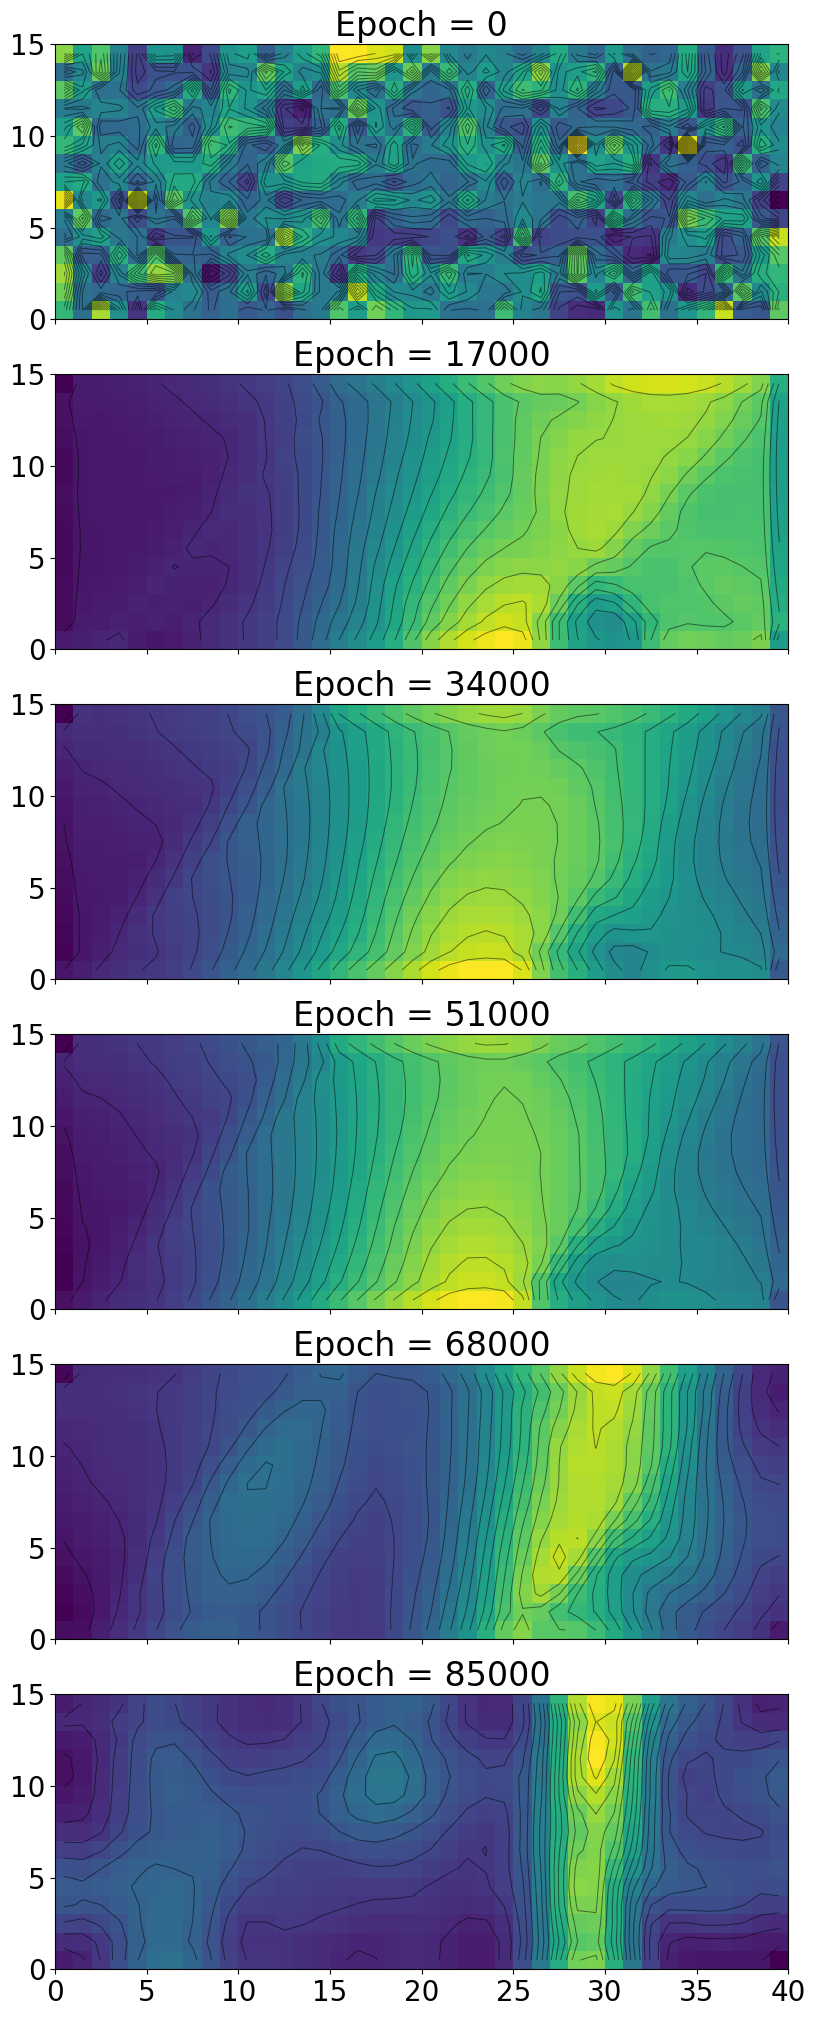

In [10]:
lattice_history = np.array(map.lattice_history)
umat_history = np.array(map.umat_history)
steps = np.linspace(0, lattice_history.shape[0] * map.save_frequency, lattice_history.shape[0], endpoint=False, dtype=int)

xdim = map.xdim
ydim = map.ydim
alpha_0 = map.alpha_0
train = map.train
X,Y = np.meshgrid(np.arange(xdim)+0.5, np.arange(ydim)+0.5)


num_plots = 6
fig, axs = plt.subplots(6, 1, figsize=(10, 25), sharex=True)
fig.subplots_adjust(hspace=0.2)
for i, k in enumerate(range(0, umat_history.shape[0], len(steps)//num_plots+1)):
    umat = umat_history[k]

    axs[i].title.set_text(f'Epoch = {steps[k]}')
    mesh = axs[i].pcolormesh(umat.T, cmap='viridis')
    axs[i].contour(X, Y, umat.T, levels=np.linspace(np.min(umat),np.max(umat), 20), colors='black', alpha=0.5, linewidths=0.7)
    axs[i].set_aspect("equal")


Merge similar centroids

In [11]:
map.umat = map.compute_umat(smoothing=3)
naive_centroids = map.compute_centroids()
merge_threshold = 0.2
merged_centroids = map.merge_similar_centroids(naive_centroids, threshold=merge_threshold)

Centroid A: (np.int64(10), np.int64(14)), count: 78
Centroid B: (np.int64(0), np.int64(12)), count: 76
Merging...
Centroid A: (np.int64(0), np.int64(0)), count: 22
Centroid B: (np.int64(0), np.int64(12)), count: 154
Merging...
Centroid A: (np.int64(21), np.int64(0)), count: 213
Centroid B: (np.int64(22), np.int64(14)), count: 47
Merging...
Centroid A: (np.int64(39), np.int64(0)), count: 97
Centroid B: (np.int64(39), np.int64(14)), count: 67
Merging...
Number of unique centroids:  3
Minimum cost between centroids:  0.38377474980900655


Visualize new centroids after merging

Centroid A: (np.int64(10), np.int64(14)), count: 78
Centroid B: (np.int64(0), np.int64(12)), count: 76
Merging...
Centroid A: (np.int64(0), np.int64(0)), count: 22
Centroid B: (np.int64(0), np.int64(12)), count: 154
Merging...
Centroid A: (np.int64(21), np.int64(0)), count: 213
Centroid B: (np.int64(22), np.int64(14)), count: 47
Merging...
Centroid A: (np.int64(39), np.int64(0)), count: 97
Centroid B: (np.int64(39), np.int64(14)), count: 67
Merging...
Number of unique centroids:  3
Minimum cost between centroids:  0.38377474980900655


Unique centroids :  {'position_x': [np.int64(0), np.int64(39), np.int64(21)], 'position_y': [np.int64(12), np.int64(0), np.int64(0)]}
Begin matching points with nodes
i = i =  45
i =  60
 0
i =  75
i =  120
i =  15
i =  135
i =  30
i =  90
i =  105


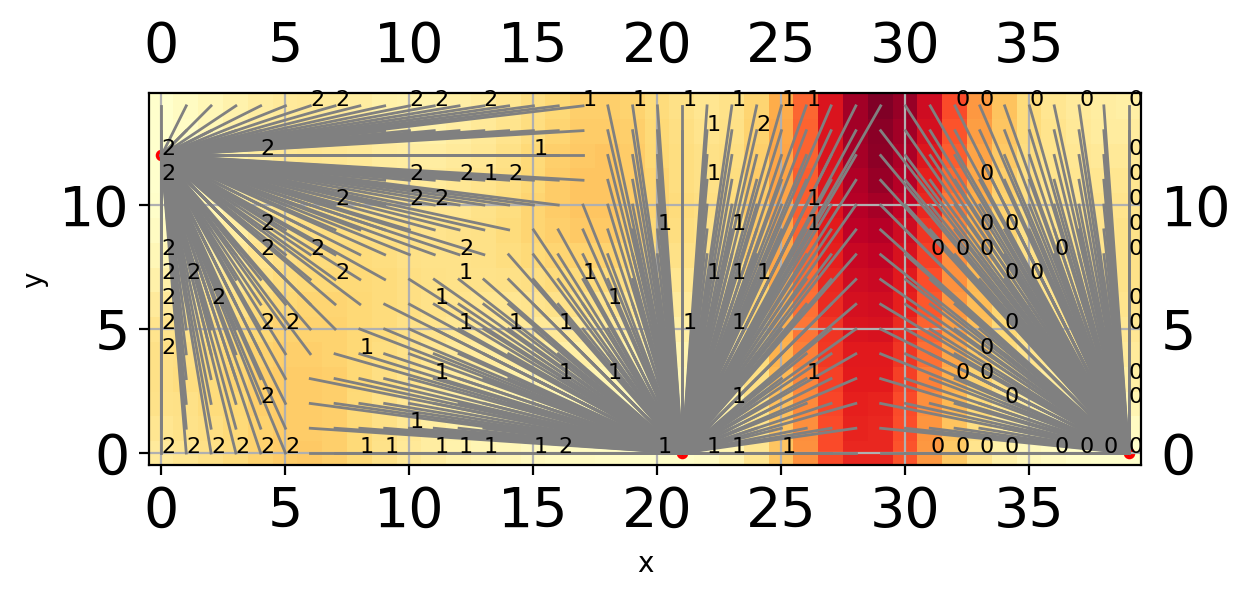

In [12]:
map.plot_heat(map.umat, merge=True, merge_cost=merge_threshold)

Project data onto lattice

Begin matching points with nodes
i =  0
i =  45
i =  90
i =  60
i =  120
i =  105
i =  75
i =  135
i =  15
i =  30
Centroid A: (np.int64(10), np.int64(14)), count: 78
Centroid B: (np.int64(0), np.int64(12)), count: 76
Merging...
Centroid A: (np.int64(0), np.int64(0)), count: 22
Centroid B: (np.int64(0), np.int64(12)), count: 154
Merging...
Centroid A: (np.int64(21), np.int64(0)), count: 213
Centroid B: (np.int64(22), np.int64(14)), count: 47
Merging...
Centroid A: (np.int64(39), np.int64(0)), count: 97
Centroid B: (np.int64(39), np.int64(14)), count: 67
Merging...
Number of unique centroids:  3
Minimum cost between centroids:  0.38377474980900655
Number of clusters : 3
Centroids:  [(np.int64(0), np.int64(12)), (np.int64(39), np.int64(0)), (np.int64(21), np.int64(0))]


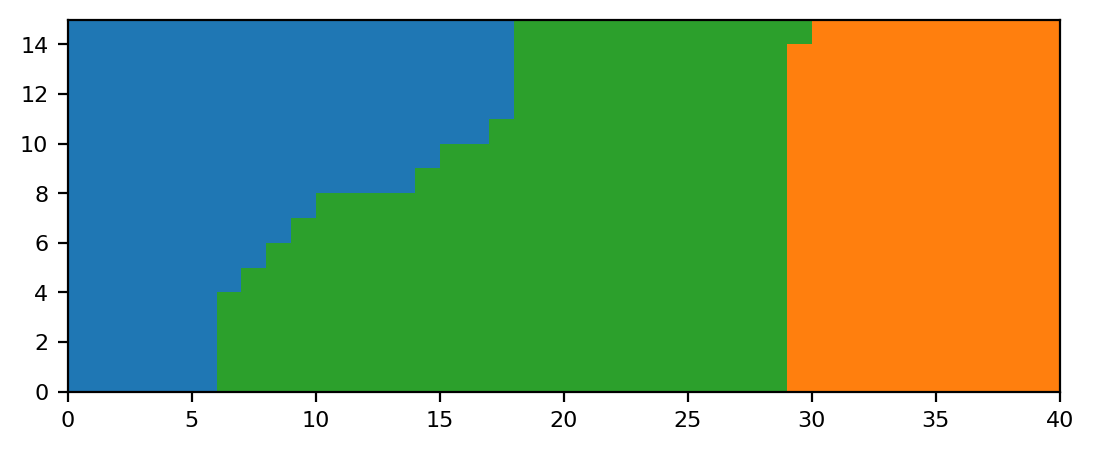

In [13]:
projection_2d = map.map_data_to_lattice()
clusters = map.assign_cluster_to_lattice(smoothing=None,merge_cost=merge_threshold)

plt.figure(dpi=200)
plt.pcolormesh(clusters.T, cmap='tab10', clim=[0,10])
plt.gca().set_aspect("equal")
plt.show()

Map cluster ids back to each data point

In [14]:
som_labels = map.assign_cluster_to_data(projection_2d, clusters)

In [15]:
som_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

Scatter plot of cluster ids from SOM

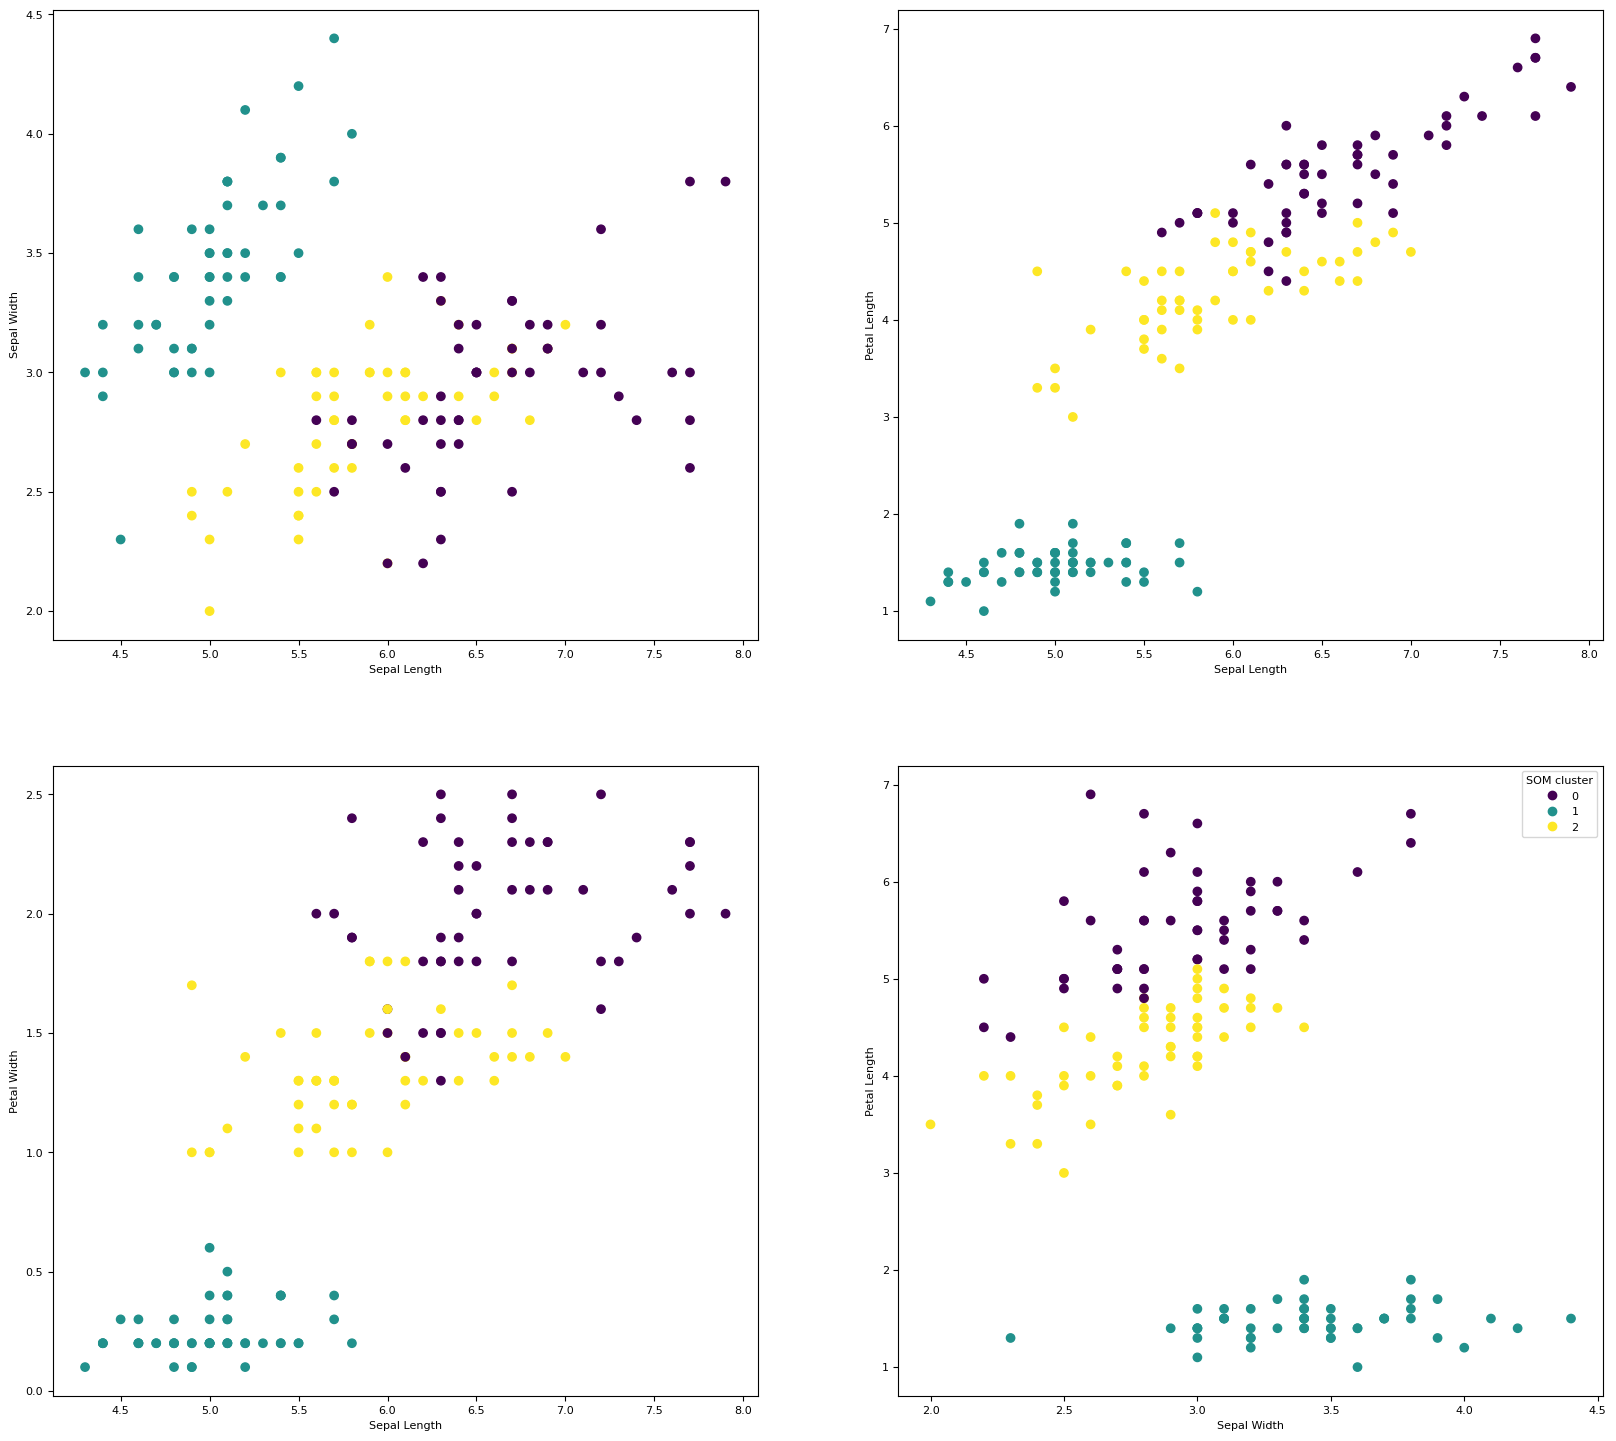

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(20, 18))
scatter = axs[0,0].scatter(iris.data[:,0], iris.data[:,1], c=som_labels, cmap='viridis')
axs[0,0].set_xlabel('Sepal Length')
axs[0,0].set_ylabel('Sepal Width')
axs[0,1].scatter(iris.data[:,0], iris.data[:,2], c=som_labels, cmap='viridis')
axs[0,1].set_xlabel('Sepal Length')
axs[0,1].set_ylabel('Petal Length')
axs[1,0].scatter(iris.data[:,0], iris.data[:,3], c=som_labels, cmap='viridis')
axs[1,0].set_xlabel('Sepal Length')
axs[1,0].set_ylabel('Petal Width')
axs[1,1].scatter(iris.data[:,1], iris.data[:,2], c=som_labels, cmap='viridis')
axs[1,1].set_xlabel('Sepal Width')
axs[1,1].set_ylabel('Petal Length')
plt.legend(scatter.legend_elements()[0], np.unique(clusters), loc="upper right", title="SOM cluster")

We compare the real label to the inferred label

In [17]:
# Assign cluster number to label; change manually
label_map = {0: 2, 1: 0, 2: 1}#{0: "versicolor", 1: "virginica", 2: "setosa"}
correct_label = 0

for i in range(len(som_labels)):
    if label_map[som_labels[i]] == iris.target[i]:
        correct_label += 1

print("Number of correct predictions: ", correct_label)
print("Precision = ", correct_label/len(som_labels) * 100, "%")


Number of correct predictions:  142
Precision =  94.66666666666667 %


Save SOM object

In [18]:
import pickle
with open('iris_som.pkl', 'wb') as f:
    pickle.dump(map, f)

Now we run multiple 

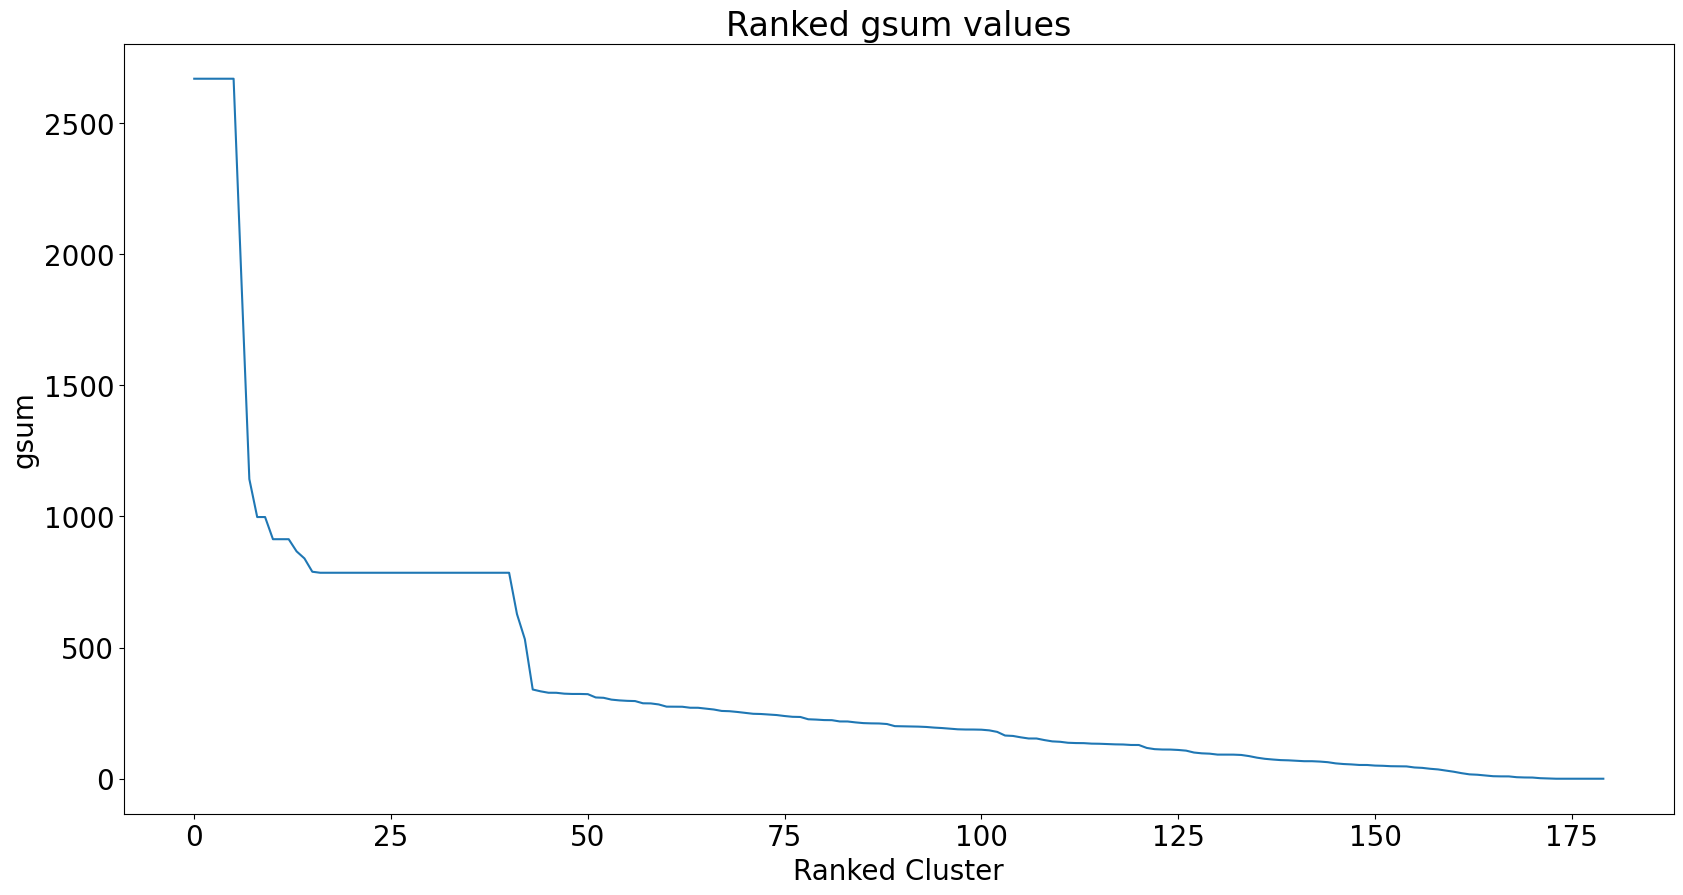

In [42]:
file_path = "/mnt/home/tha10/jupyter-notebooks/som-out-iris/SCE"

mapping = dict()
    
# read in the multimap mapping file and store in a dict that includes the file as key name, and the cluster_id and gsum as values
with open(file_path + "/multimap_mappings.txt", 'r') as f:
    for line in f:
        line = line.strip("\n")
        if not line[0].isnumeric():
            key_name = line.strip("clusters_").strip(".npy")
            mapping[key_name] = []
        else:
            mapping[key_name].append(line.split(" "))

map_list = []
for key in mapping.keys():
    map_list.extend([[float(i[1]), int(i[0]), key] for i in mapping[key]])
        
# sort the list based on gsum value
map_list.sort(key=lambda map_list: map_list[0], reverse=True)

# plot the gsum values
plt.figure(figsize=(20, 10))
plt.plot([i[0] for i in map_list])
plt.xlabel("Ranked Cluster")
plt.ylabel("gsum")
plt.title("Ranked gsum values")
plt.show()

Load the combined SCE clusters

In [17]:
sce_clusters = np.load(file_path + "/all_binary_maps.npy")

In [23]:
sce_clusters.shape

(5, 150)

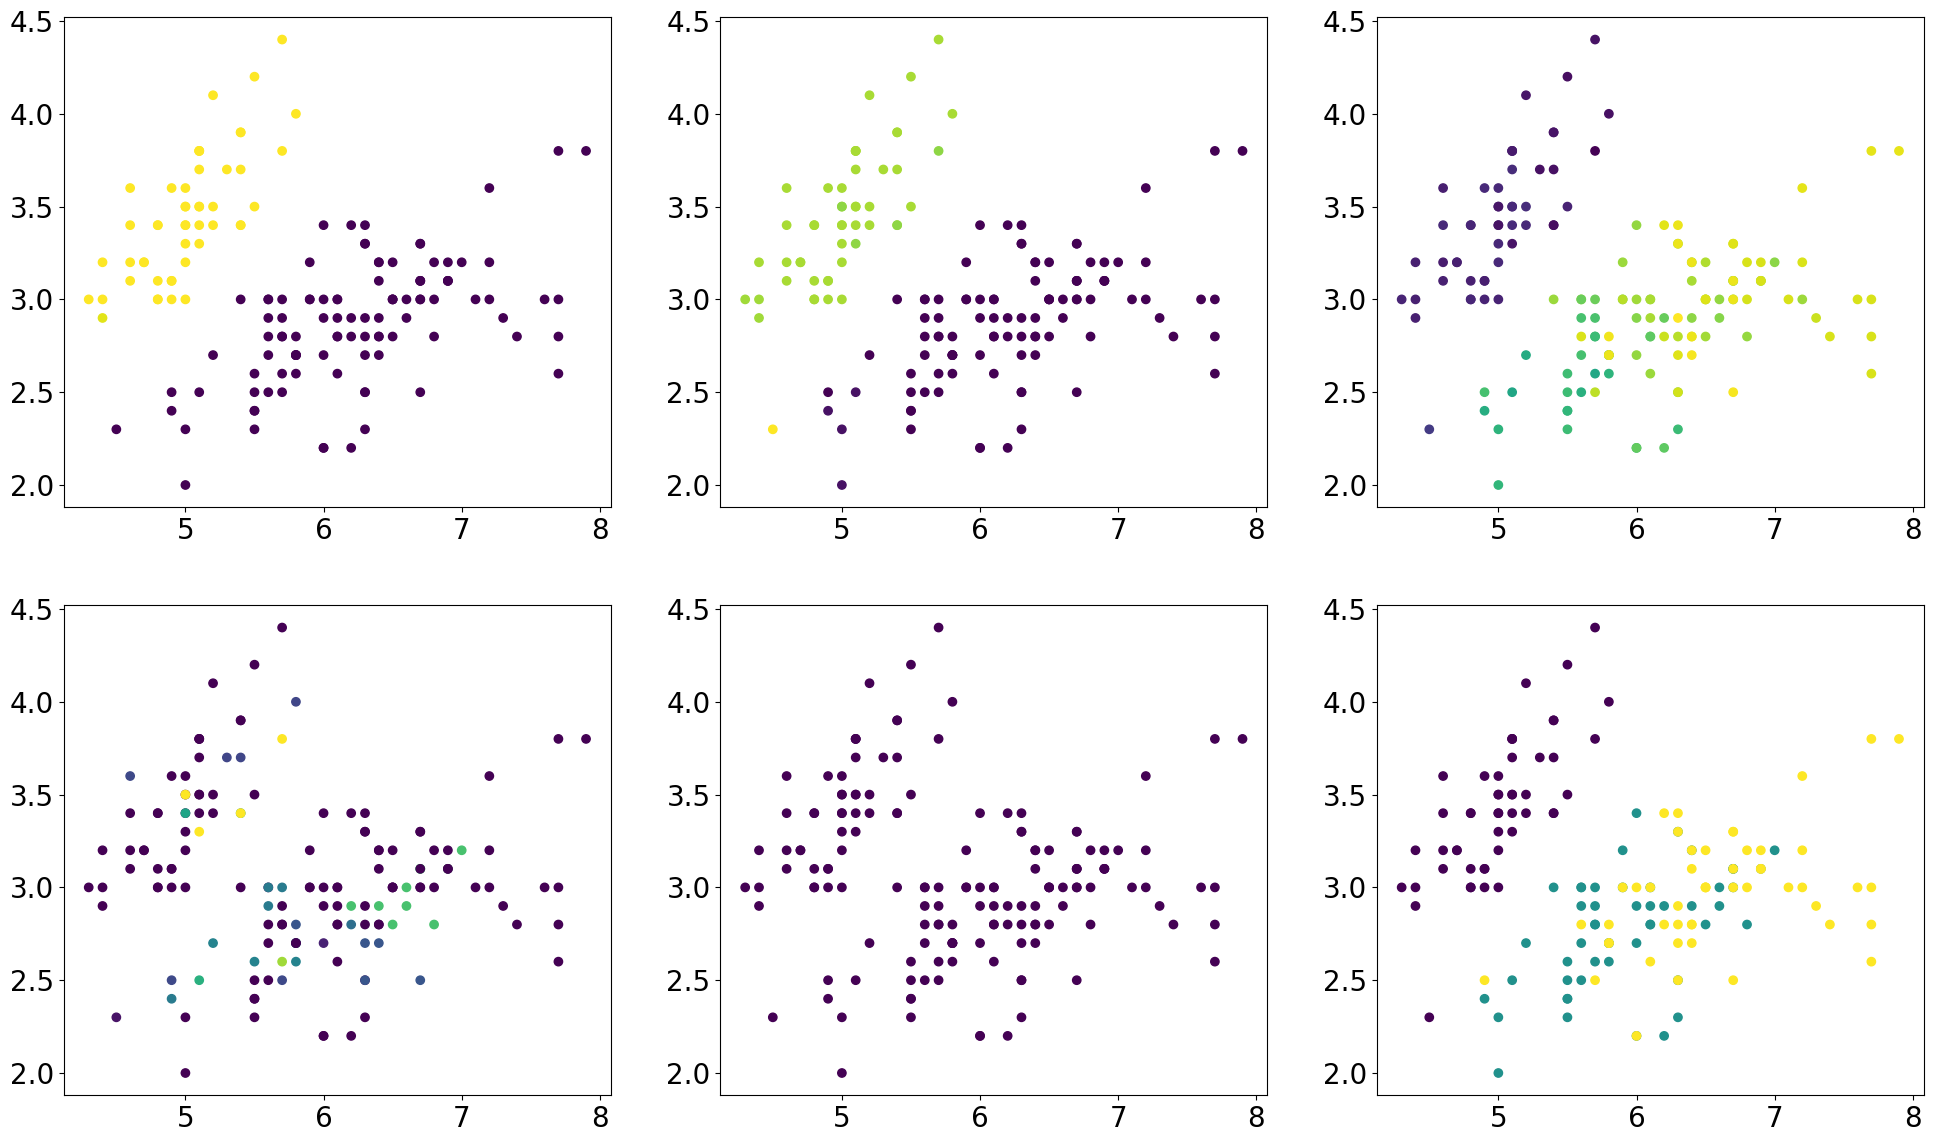

In [37]:
# plot the cluster maps
fig, axs = plt.subplots(2, 3, figsize=(24, 14))
axs[0,0].scatter(iris.data[:,0], iris.data[:,1], c=sce_clusters[0], cmap='viridis')
axs[0,1].scatter(iris.data[:,0], iris.data[:,1], c=sce_clusters[1], cmap='viridis')
axs[0,2].scatter(iris.data[:,0], iris.data[:,1], c=sce_clusters[2], cmap='viridis')
axs[1,0].scatter(iris.data[:,0], iris.data[:,1], c=sce_clusters[3], cmap='viridis')
axs[1,1].scatter(iris.data[:,0], iris.data[:,1], c=sce_clusters[4], cmap='viridis')
axs[1,2].scatter(iris.data[:,0], iris.data[:,1], c=iris.target, cmap='viridis')

([<matplotlib.axis.XTick at 0x1554cdc1eec0>,
 [Text(0, 0, '0'),
  Text(5000, 0, '5000'),
  Text(10000, 0, '10000'),
  Text(15000, 0, '15000'),
  Text(20000, 0, '20000')])

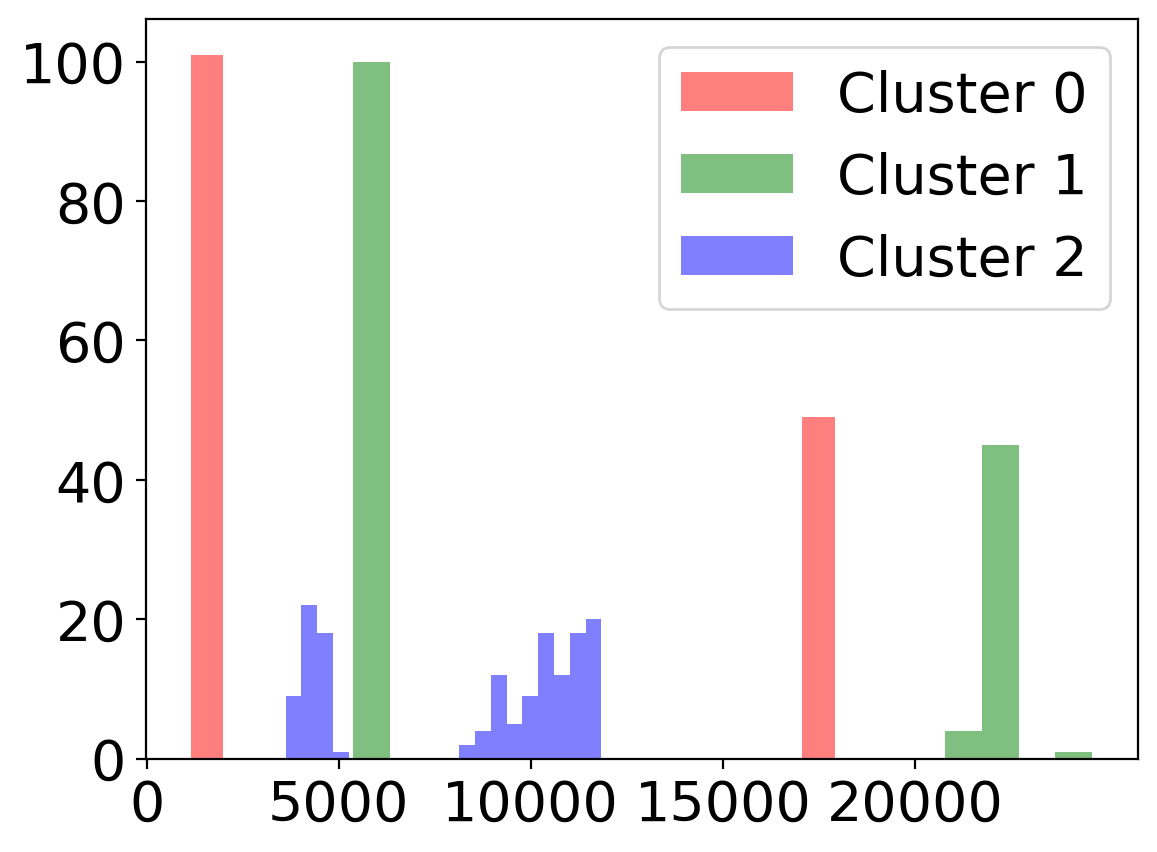

In [22]:
plt.figure(dpi=200)
plt.hist(sce_clusters[0], bins=20, color='r', alpha=0.5, label='Cluster 0')
plt.hist(sce_clusters[1], bins=20, color='g', alpha=0.5, label='Cluster 1')
plt.hist(sce_clusters[2], bins=20, color='b', alpha=0.5, label='Cluster 2')
# plt.hist(sce_clusters[3], bins=20, color='y', alpha=0.5, label='Cluster 3')
plt.legend()
plt.xticks([0, 5000, 10000, 15000, 20000])

Set a cutoff

In [23]:
signal_cutoff = 7500
cluster0 = np.where(sce_clusters[0] > signal_cutoff, sce_clusters[0], 0)
cluster1 = np.where(sce_clusters[1] > signal_cutoff, sce_clusters[1], 0)
cluster2 = np.where(sce_clusters[2] > signal_cutoff, sce_clusters[2], 0)

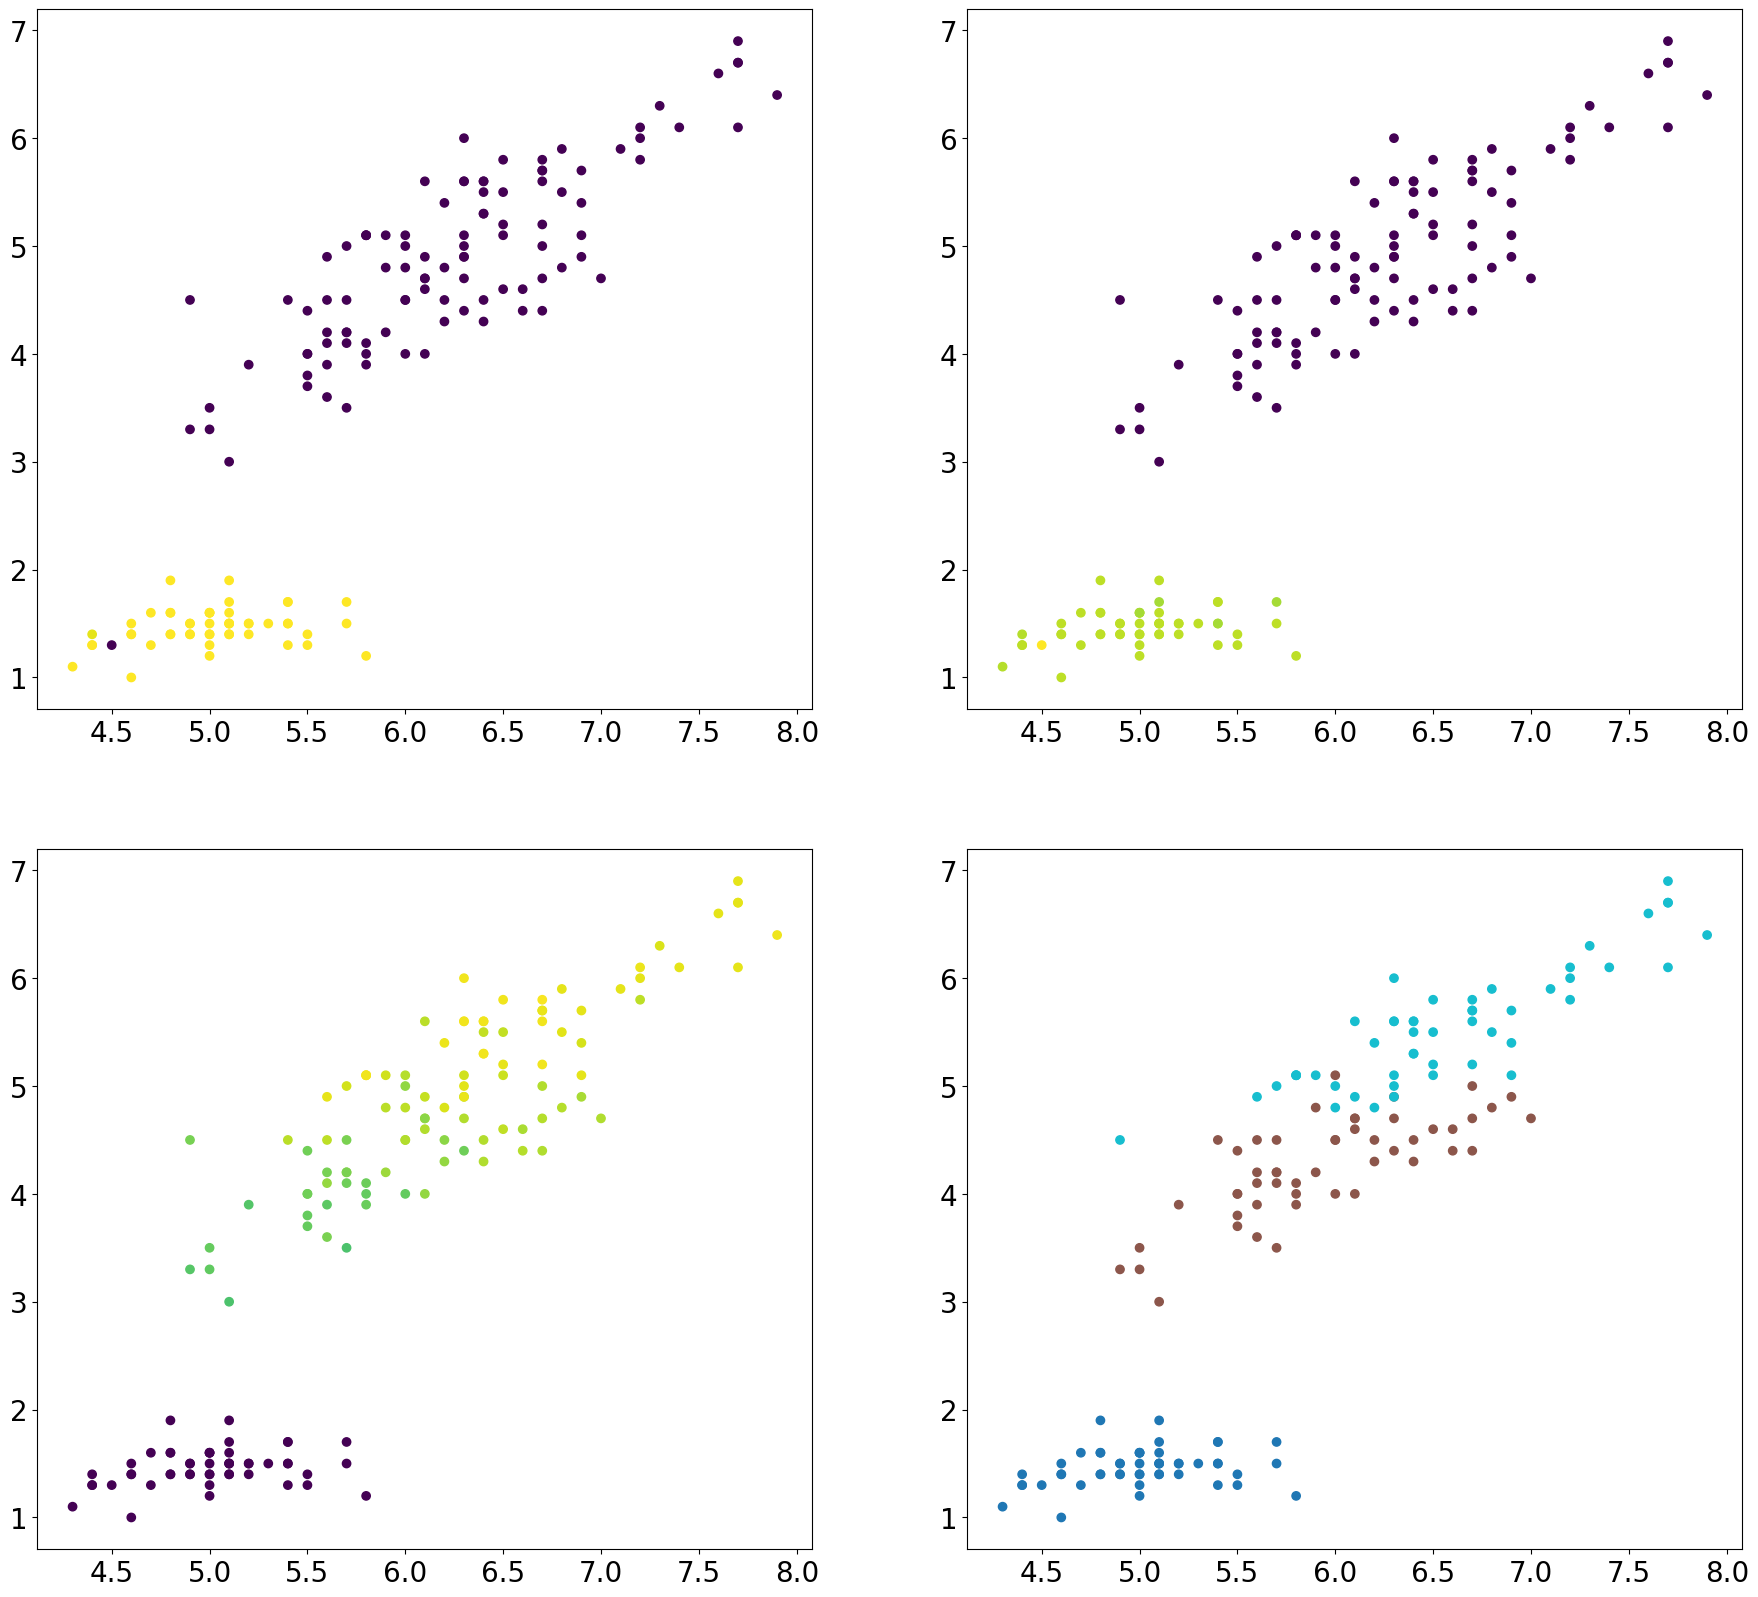

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(22, 20))
axs[0,0].scatter(iris.data[:,0], iris.data[:,2], c=cluster0, cmap='viridis')
axs[0,1].scatter(iris.data[:,0], iris.data[:,2], c=cluster1, cmap='viridis')
axs[1,0].scatter(iris.data[:,0], iris.data[:,2], c=cluster2, cmap='viridis')
axs[1,1].scatter(iris.data[:,0], iris.data[:,2], c=iris.target, cmap='tab10')

(array([50.,  0.,  0.,  0.,  0.,  0.,  0., 22., 29., 49.]),
 array([    0.        ,  1183.49194336,  2366.98388672,  3550.47558594,
         4733.96777344,  5917.45947266,  7100.95117188,  8284.44335938,
         9467.93554688, 10651.42675781, 11834.91894531]),
 <BarContainer object of 10 artists>)

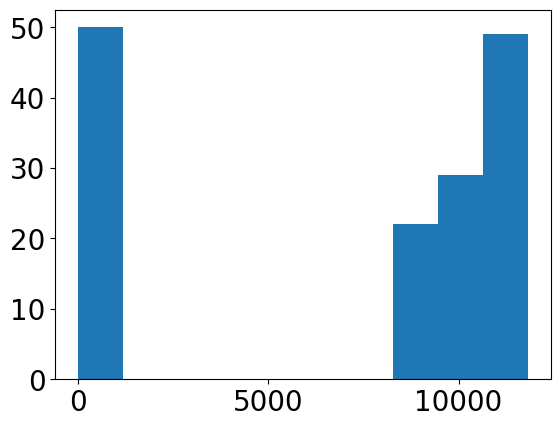

In [43]:
plt.hist(cluster2)

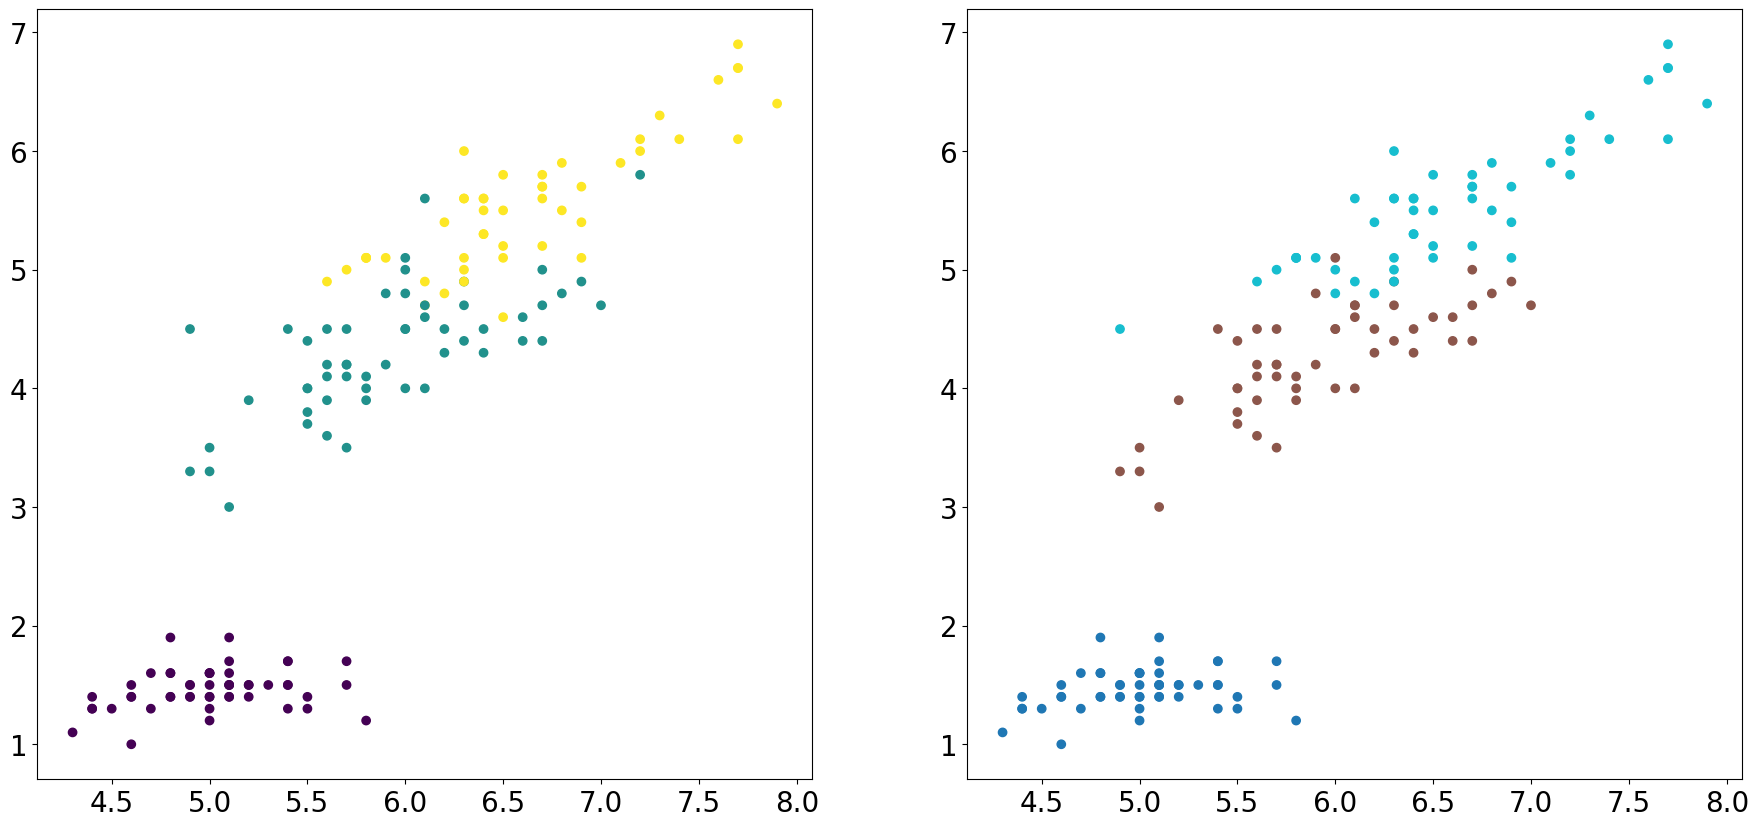

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(22, 10))
axs[0].scatter(iris.data[:,0], iris.data[:,2], c=[(2 if cluster2[i] > 10700 else(1 if cluster2[i] > 0 else 0)) for i in range(len(cluster2))], cmap='viridis')
axs[1].scatter(iris.data[:,0], iris.data[:,2], c=iris.target, cmap='tab10')

In [27]:
sum_all_clusters = np.sum(sce_clusters, axis=0)

(array([29., 54., 17.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  2., 47.]),
 array([15022.81445312, 16505.43945312, 17988.06445312, 19470.68945312,
        20953.3125    , 22435.9375    , 23918.5625    , 25401.1875    ,
        26883.8125    , 28366.4375    , 29849.0625    , 31331.68554688,
        32814.3125    , 34296.9375    , 35779.55859375, 37262.18359375,
        38744.80859375, 40227.43359375, 41710.05859375, 43192.68359375,
        44675.30859375]),
 <BarContainer object of 20 artists>)

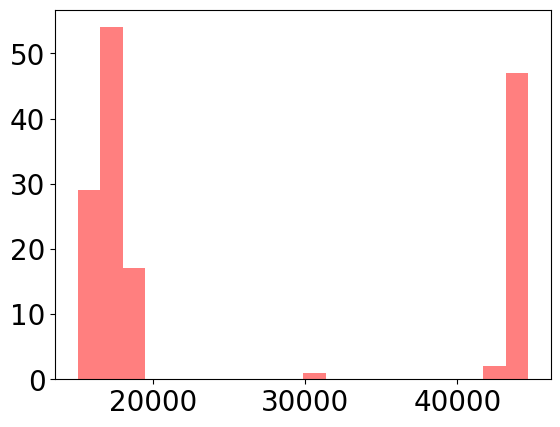

In [35]:
plt.hist(sum_all_clusters, bins=20, color='r', alpha=0.5, label='All Clusters')